In [0]:
%matplotlib inline

In [0]:
!git clone https://github.com/nickdelgrosso/amgen_workshop2019.git

fatal: destination path 'amgen_workshop2019' already exists and is not an empty directory.


# Pandas and DataFrames

Often, we have tables of data--collections of named columns arranged in rows.  The **Pandas** package gives us a **DataFrame()** class that lets us index these columns the same way as with dicts, while still getting the benefit of Numpy arrays, meaning we can still write vectorized code.  

Let's start playing with the analysis now.  We'll examine Pandas in more depth in the coming days.

In [0]:
import pandas

Please open the file “MentalRotation.csv” (pd.read_csv()) and use it to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about this experiment!

In [0]:
df = pandas.read_csv('amgen_workshop2019/MentalRotation.csv')
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


In [0]:
df['Trialj']

## Examining the Dataset

**head()**, **tail()**, **sample()**

Look at the first 5 lines of the dataset

In [0]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3.107000e-09,True,32,M
1,49,2,150,0,n,2.930000e-09,True,32,M
2,49,3,150,1,b,1.874000e-09,True,32,M
3,49,4,100,1,b,3.793000e-09,True,32,M
4,49,5,50,1,b,2.184000e-09,True,32,M


Look at the last 5 lines of the dataset

In [0]:
df.tail()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2.095000e-09,True,20,F
5067,33,93,150,0,n,2.125000e-09,True,20,F
5068,33,94,50,0,n,1.226000e-09,True,20,F
5069,33,95,100,1,b,2.783000e-09,True,20,F
5070,33,96,0,0,n,1.017000e-09,True,20,F


Check 3 random lines in the dataset.

In [0]:
df.sample(3)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
4670,46,77,0,1,b,2.043000e-09,True,19,F
4907,6,28,100,1,b,1.675000e-09,True,21,M
141,40,47,0,1,b,1.095000e-09,True,21,F


How Many Total Trials (rows) are in the study?

In [0]:
df.count()

Subject     5071
Trial       5071
Angle       5071
Matching    5071
Response    5071
Time        5071
Correct     5071
Age         5071
Sex         5071
dtype: int64

In [0]:
df["Subject"].count()

5071

In [0]:
len(df["Trial"])

5071

In [0]:
df.shape

(5071, 9)

What is the maximum number of trials that one subject performed?

In [0]:
df["Trial"].max()

96

In [0]:
df["Trial"].describe()

count    5071.000000
mean       48.775192
std        27.653790
min         1.000000
25%        25.000000
50%        49.000000
75%        73.000000
max        96.000000
Name: Trial, dtype: float64

In [0]:
df["Trial"].nunique()

96

In [0]:
df["Trial"].max()

96

In [0]:
df.groupby("Subject")["Trial"].count().min()

85

In [0]:
df.groupby("Correct").get_group(1)

In [0]:
df.groupby("Matching")["Correct"].mean()

Matching
0    0.909163
1    0.899961
Name: Correct, dtype: float64

### Making New Columns

Convert the Time column to seconds by dividing it by 1000.

In [0]:
df["TimeSecs"] = df["Time"] / 1000
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs
0,49,1,0,0,n,3107,1,32,M,3.107
1,49,2,150,0,n,2930,1,32,M,2.930
2,49,3,150,1,b,1874,1,32,M,1.874
3,49,4,100,1,b,3793,1,32,M,3.793
4,49,5,50,1,b,2184,1,32,M,2.184


Change the "Correct" column to *bool* (True/False) using the **astype()** method

In [0]:
(
    df  # Take my dataset
    .groupby("Correct")  # Split into "correct" and "incorrect" groups
    .count()  # Count the number of non-missing rows
    ["Matching"]  # Get the column  called "Matching"
)

Correct
0     484
1    4587
Name: Matching, dtype: int64

In [0]:
df.to_excel("new data.xlsx")

### The mean() method

What is the mean response time, across all trials?

What percent of trials were answered correctly?

What percent of trials were “Matching” trials?

### Slicing

Is there a difference in accuracy between matching and non-matching trials?

Is there a response time difference between matching and nonmatching
trials?

Is there a response time difference between matching and nonmatching trials, for different rotation Angles?

### Plotting

Plot the response time distribution as a histogram.

In [0]:
import seaborn as sns

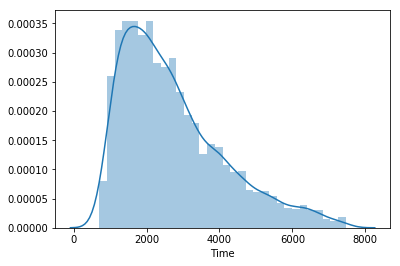

In [0]:
sns.distplot(df["Time"])

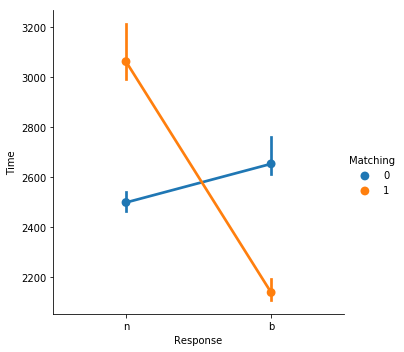

In [0]:
import numpy as np
sns.catplot(data=df, x="Response", hue="Matching", y="Time", kind="point", estimator=np.median, ci=68);

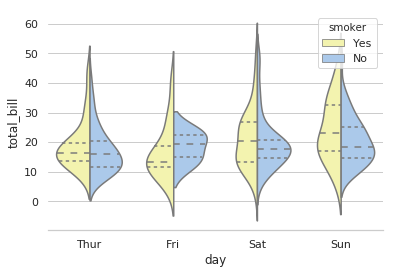

In [0]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

In [0]:
!pip install --upgrade plotly

     |████████████████████████████████| 7.1MB 4.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
import plotly.express as px

In [0]:
px.scatter(df.sort_values("Subject"), x="Trial", y="Time", facet_row="Matching", animation_frame="Subject")

Plot the average response time for each stimulus category (matching and non-matching)

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship

Is there a difference in the relationship between Angle of mental rotation and response time, between stimulus categories?